<center><h1>Pandas vs. DuckDB</h1>
<div>
    <img src="images/tutorial_title.png" alt="DuckDB vs. Pandas" width="700", height="700">
        </div>
<!-- ![DuckDB vs Pandas](images/tutorial_title.png) -->
 </center>

<h3>Introduction</h3>

In the data analytics world, in Python, we often make use of Pandas to do analytics and some ETL. <br>
There is another option, using DuckDB. DuckdDB is an in-process SQL Database that can operate efficiently on large datasets, making it a good alternative to PAndas in certain use cases.<br>
<br>
We will explore some calculation differences, show some use cases to give you the information to make your own conclusions.<br>

<h5>Setup</h5>

In [5]:
import duckdb  # Can be installed with a pip install duckdb. More info available at: https://duckdb.org/
import pandas as pd
import numpy as np
import time

pd.set_option('display.max_columns',None)  # Setting max display columns beyond default.
pd.set_option('display.max_rows',None)  # Setting max display rows| beyond default.

First, let's generate a dataframe of a million rows, some random values for each and a rnadom choice of categories.<br>
<br>
We'll use this dataframe with both Pandas and Duckdb to perform similar calculations, and use the time function to mark the differences.<br>



In [7]:
# Creating a sample dataframe with 1 million rows
data = {
    'id': np.arange(1,1000001),
    'value': np.random.randn(1000000),
    'category': np.random.choice(['A', 'B', 'C'], size=1000000)
}

df = pd.DataFrame(data)

Now let's roll through a simple calculation with both.

In [9]:
# Using Pandas for querying data

start_time = time.time()

# Filtering rows where the category ios A, then calculating the mean value.
results_pandas = df[df['category'] == 'A']['value'].mean()

pandas_time = time.time() - start_time
print(f'The result is: {results_pandas}. Pandas processing time: {pandas_time: .4f} seconds')

The result is: 0.001824800982477696. Pandas processing time:  0.0465 seconds


In [10]:
# Using Duckdb to accomplish the task.

# Load the dataframe into duckdb
conn = duckdb.connect('output/duck_demo.ddb')  # Convention for DuckDB databse extensions arewe ddb
conn.execute('Create or replace table test_table as select * from df')

start_time = time.time()

# Using SQL to filter rows where category is A then calculating mean value
results_duckdb = conn.execute("""
                              Select
                              AVG(value)
                              from test_table where category = 'A'
""").fetchall()[0][0]

duckdb_time = time.time() - start_time
print(f'The result is: {results_duckdb}. Duckdb processing time: {duckdb_time: .4f} seconds')

The result is: 0.0018248009824776872. Duckdb processing time:  0.0030 seconds


As you can see, there appears to be some efficiencies with using Duckdb over Pandas.

In [12]:
# Comparisons
print('Processing 1 million rows with our scenario.')
print(f'Pandas processing time: {pandas_time: .4f} seconds')
print(f'Duckdb processing time: {duckdb_time: .4f} seconds')

Processing 1 million rows with our scenario.
Pandas processing time:  0.0465 seconds
Duckdb processing time:  0.0030 seconds


Let's get a bump in numbers and go for a bigger dataset, and see what savings if any, we can see.

In [14]:
# Bigger!

# Creating a sample dataframe with 10 million rows
data = {
    'id': np.arange(1,10000001),
    'value': np.random.randn(10000000),
    'category': np.random.choice(['A', 'B', 'C'], size=10000000)
}

df_large = pd.DataFrame(data)

In [15]:
# Using Pandas for querying data

start_time = time.time()

# Filtering rows where the category is B, then calculating the mean value.
large_results_pandas = df[df['category'] == 'B']['value'].mean()
large_pandas_time = time.time() - start_time


conn.execute('Create or replace table test_large as select * from df_large')
start_time = time.time()

# Using SQL to filter rows where category is B then calculating mean value
large_results_duckdb = conn.execute("""
                              Select
                              AVG(value)
                              from test_large where category = 'B'
""").fetchall()[0][0]

conn.close()  # Closing off the conneciton.

large_duckdb_time = time.time() - start_time
print(f'The result is: {large_results_duckdb}. Duckdb processing time: {large_duckdb_time: .4f} seconds')
print(f'The result is: {large_results_pandas}. Pandas processing time: {large_pandas_time: .4f} seconds')

The result is: 0.0010386221884328072. Duckdb processing time:  0.0290 seconds
The result is: 0.0006235917336693897. Pandas processing time:  0.0499 seconds


There are some efficiencies wto be relaized here too, but there is a trade-off from resident memory to harddisk space. <br>

![DuckDB Sizes](images/duckdb_size.png)
<br>
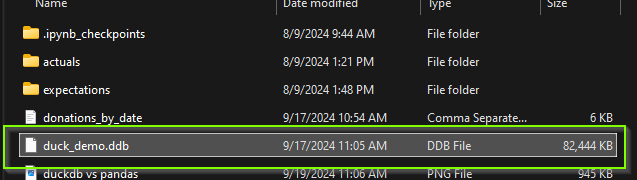

It will be for you to see which is better suited for your use cases, however, since we have created a database file, and closed the connection, <br>
We are also free to explore this information in a stand alone database explorer!
<br>
![DB in other tools](images\test_table.png)
<br>

You can extend this example by growing the dataset, running more complex queries or joins to further compare performance.

<div>
    <img src="images/explorers.jpg" alt="Time to Explore" width="500", height="500">
        </div>
<!-- ![Exploring the world](images/explorers.jpg) -->

<h2> Real World Exploration </h2>

Moving this to a real world exapmple, here is some data on blood types available at: <a href="https://www.kaggle.com/datasets/kamilenovaes/global-blood-type-distribution?resource=download">Kaggle</a><br><br>

Let's move to create a new database to hold the data.

In [23]:
conn = duckdb.connect('output/blood_types.ddb')

There are a number of ways to load files into Duckdb. For the above examples, we grabbed the information from, the dataframe itself.<br>
We can load directly from files like csv files, or Parquet files. Parquet files are an open source file type that is much more information efficient, being much more efficient than zipping up csv files, as an example.<br><br>

In [25]:
# Loading table
conn.execute('''
Create or replace table blood_types as
select * from read_csv('example_data/blood_types.csv');
''')

There are a number of ways to call this information back:<br><br>

<ul>
    <li>We can look at the db table itself, and show it.</li>
    <li>We can execute a SQL statement against the db and make it a dataframe.</li>
    <li>We could use SQL and just list the results on screen.</li>
</ul>

In [27]:
# Calling the Table Object
conn.table('blood_types').show(max_rows = 10)

┌───────────┬────────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│  Country  │ Population │   O+   │   A+   │   B+   │  AB+   │   O-   │   A-   │   B-   │  AB-   │
│  varchar  │   int64    │ double │ double │ double │ double │ double │ double │ double │ double │
├───────────┼────────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│ Albania   │    3074579 │   34.1 │   31.2 │   14.5 │    5.2 │    6.0 │    5.5 │    2.6 │    0.9 │
│ Algeria   │   43576691 │   40.0 │   30.0 │   15.0 │   4.25 │    6.6 │    2.3 │    1.1 │   0.75 │
│ Argentina │   45479118 │   48.9 │  31.54 │    8.0 │   2.45 │    4.9 │   3.16 │    0.8 │   0.25 │
│ Armenia   │    3021324 │   29.0 │   46.3 │   12.0 │    5.6 │    2.0 │    3.7 │    1.0 │    0.4 │
│ Australia │   25466459 │   38.0 │   32.0 │   12.0 │    4.0 │    7.0 │    6.0 │    2.0 │    1.0 │
│     ·     │       ·    │     ·  │     ·  │     ·  │     ·  │     ·  │     ·  │     ·  │     ·  │
│     ·   

In [28]:
# Viewing as a dataframe
conn.execute('select * from blood_types').fetchdf()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579,34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,43576691,40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,45479118,48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,3021324,29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,25466459,38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
5,Austria,8859449,30.00,37.00,12.00,5.00,6.00,7.00,2.00,0.45
6,Azerbaijan,10205810,29.80,30.00,21.10,9.00,3.30,3.40,2.40,1.00
7,Bahrain,1505003,48.48,19.35,22.61,3.67,3.27,1.33,1.04,0.25
8,Bangladesh,164098818,29.21,26.30,33.12,9.59,0.53,0.48,0.60,0.17
9,Belarus,9441842,32.30,30.60,15.30,6.80,5.70,5.40,2.70,1.20


In [29]:
# Easy way to give a quick row count.
conn.execute('select count(*) from blood_types').fetchall()

[(126,)]

Now, let's get some world facts that we can join together with our blood types. Also sourcing this from: <a href="https://www.kaggle.com/code/melissamonfared/global-country-information-visualization/input">Kaggle</a>. I have also used <a href="https://www.chatdb.ai/tools/csv-to-parquet-converter"> Parquet Converter</a> to convert the csv to parquet for the purposes of this exploration.

In [31]:
# Loading Expectations
conn.execute('''
Create or replace table world_facts as
select * from read_parquet('example_data/world-data-2023.parquet');
''')

In [32]:
conn.execute('select * from world_facts limit 10').fetchdf()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,None,7.20,376,Andorra la Vella,469,None,None,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,None,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",None,None,None,None,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1,"St. John's, Saint John",557,113.81,1.20%,XCD,1.99,22.30%,$0.99,"$1,727,759,259",105.00%,24.80%,5.0,"St. John's, Saint John",76.9,42.0,$3.04,English,24.30%,2.76,"97,118",None,16.50%,43.00%,None,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54,Buenos Aires,"201,348",232.75,53.50%,ARS,2.26,9.80%,$1.10,"$449,663,446,954",109.70%,90.00%,8.8,Buenos Aires,76.5,39.0,$3.35,Spanish,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374,Yerevan,"5,156",129.18,1.40%,AMD,1.76,11.70%,$0.77,"$13,672,802,158",92.70%,54.60%,11.0,Yerevan,74.9,26.0,$0.66,Armenian,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61,Canberra,"375,908",119.8,1.60%,AUD,1.74,16.30%,$0.93,"$1,392,680,589,329",100.30%,113.10%,3.1,Sydney,82.7,6.0,$13.59,None,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43,Vienna,"61,448",118.06,1.50%,EUR,1.47,46.90%,$1.20,"$446,314,739,528",103.10%,85.10%,2.9,Vienna,81.6,5.0,None,German,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


Now, let's start playing with this data.

In [34]:
conn.execute('''
select * from world_facts wf
left join blood_types bt on wf.Country = bt.Country
''').fetchdf()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Country_1,Population_1,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331,Albania,3.074579e+06,34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626,Algeria,4.357669e+07,40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,53.50%,ARS,2.26,9.80%,$1.10,"$449,663,446,954",109.70%,90.00%,8.8,Buenos Aires,76.5,39.0,$3.35,Spanish,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672,Argentina,4.547912e+07,48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",129.18,1.40%,AMD,1.76,11.70%,$0.77,"$13,672,802,158",92.70%,54.60%,11.0,Yerevan,74.9,26.0,$0.66,Armenian,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189,Armenia,3.021324e+06,29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",119.8,1.60%,AUD,1.74,16.30%,$0.93,"$1,392,680,589,329",100.30%,113.10%,3.1,Sydney,82.7,6.0,$13.59,None,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136,Australia,2.546646e+07,38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
5,Azerbaijan,123,AZ,57.70%,"86,600","82,000",14.00,994.0,Baku,"37,620",156.32,2.60%,AZN,1.73,14.10%,$0.56,"$39,207,000,000",99.70%,27.70%,19.2,Baku,72.9,26.0,$0.47,Azerbaijani language,78.60%,3.45,"10,023,318",66.50%,13.00%,40.70%,5.51%,"5,616,165",40.143105,47.576927,Azerbaijan,1.020581e+07,29.80,30.00,21.10,9.00,3.30,3.40,2.40,1.00
6,Bahrain,"2,239",BH,11.10%,765,"19,000",13.99,973.0,Manama,"31,694",117.59,2.10%,BHD,1.99,0.80%,$0.43,"$38,574,069,149",99.40%,50.50%,6.1,Riffa,77.2,14.0,None,Arabic,25.10%,0.93,"1,501,635",73.40%,4.20%,13.80%,0.71%,"1,467,109",26.066700,50.557700,Bahrain,1.505003e+06,48.48,19.35,22.61,3.67,3.27,1.33,1.04,0.25
7,Bangladesh,"1,265",BD,70.60%,"148,460","221,000",18.18,880.0,Dhaka,"84,246",179.68,5.60%,BDT,2.04,11.00%,$1.12,"$302,571,254,131",116.50%,20.60%,25.1,Dhaka,72.3,173.0,$0.51,Bengali,71.80%,0.58,"167,310,838",59.00%,8.80%,33.40%,4.19%,"60,987,417",23.684994,90.356331,Bangladesh,1.640988e+08,29.21,26.30,33.12,9.59,0.53,0.48,0.60,0.17
8,Belarus,47,BY,42.00%,"207,600","155,000",9.90,375.0,Minsk,"58,280",None,5.60%,BYN,1.45,42.60%,$0.60,"$63,080,457,023",100.50%,87.40%,2.6,Minsk,74.2,2.0,$1.49,Russian,34.50%,5.19,"9,466,856",64.10%,14.70%,53.30%,4.59%,"7,482,982",53.709807,27.953389,Belarus,9.441842e+06,32.30,30.60,15.30,6.80,5.70,5.40,2.70,1.20
9,Belgium,383,BE,44.60%,"30,528","32,000",10.30,32.0,City of Brussels,"96,889",117.11,1.40%,EUR,1.62,22.60%,$1.43,"$529,606,710,418",103.90%,79.70%,2.9,Brussels,81.6,5.0,$10.31,French,17.60%,3.07,"11,484,055",53.60%,24.00%,55.40%,5.59%,"11,259,082",50.503887,4.469936,Belgium,1.172072e+07,38.00,34.00,8.50,4.00,7.00,6.00,1.50,1.00


Let's too much data too look at, so let's start filtering.

In [36]:
conn.execute('''
select 
wf.Country, wf."Official language",wf."Capital/Major City", wf.Population, 
bt."O+", bt."A+", bt."B+", bt."AB+", bt."O-", bt."A-", bt."B-", bt."AB-"
from world_facts wf
left join blood_types bt on wf.Country = bt.Country
where bt."O+" > 1
''').fetchdf()

,Country,Official language,Capital/Major City,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,Albanian,Tirana,"2,854,191",34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,Arabic,Algiers,"43,053,054",40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,Spanish,Buenos Aires,"44,938,712",48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,Armenian,Yerevan,"2,957,731",29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,None,Canberra,"25,766,605",38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
5,Azerbaijan,Azerbaijani language,Baku,"10,023,318",29.80,30.00,21.10,9.00,3.30,3.40,2.40,1.00
6,Bahrain,Arabic,Manama,"1,501,635",48.48,19.35,22.61,3.67,3.27,1.33,1.04,0.25
7,Bangladesh,Bengali,Dhaka,"167,310,838",29.21,26.30,33.12,9.59,0.53,0.48,0.60,0.17
8,Belarus,Russian,Minsk,"9,466,856",32.30,30.60,15.30,6.80,5.70,5.40,2.70,1.20
9,Belgium,French,City of Brussels,"11,484,055",38.00,34.00,8.50,4.00,7.00,6.00,1.50,1.00


Now let's take the data, and get it into a dataframe ready to export.

In [38]:
duckdb_data_df = conn.execute('''
select 
wf.Country, wf."Official language" as "Language",wf."Capital/Major City" as Capital, wf.Population, 
bt."O+", bt."A+", bt."B+", bt."AB+", bt."O-", bt."A-", bt."B-", bt."AB-"
from world_facts wf
left join blood_types bt on wf.Country = bt.Country
where bt."O+" > 1
order by wf.Country
''').fetchdf()
display (duckdb_data_df)

,Country,Language,Capital,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,Albanian,Tirana,"2,854,191",34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,Arabic,Algiers,"43,053,054",40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,Spanish,Buenos Aires,"44,938,712",48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,Armenian,Yerevan,"2,957,731",29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,None,Canberra,"25,766,605",38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
5,Austria,German,Vienna,"8,877,067",30.00,37.00,12.00,5.00,6.00,7.00,2.00,0.45
6,Azerbaijan,Azerbaijani language,Baku,"10,023,318",29.80,30.00,21.10,9.00,3.30,3.40,2.40,1.00
7,Bahrain,Arabic,Manama,"1,501,635",48.48,19.35,22.61,3.67,3.27,1.33,1.04,0.25
8,Bangladesh,Bengali,Dhaka,"167,310,838",29.21,26.30,33.12,9.59,0.53,0.48,0.60,0.17
9,Belarus,Russian,Minsk,"9,466,856",32.30,30.60,15.30,6.80,5.70,5.40,2.70,1.20


Within Pandas, let's just clean out those unprintable characters.

In [40]:
# Regex removing unprintable characters.
duckdb_data_df['Capital'] = duckdb_data_df.Capital.replace({r'[^\x00-\x7F]+':''}, regex=True)
display(duckdb_data_df)

,Country,Language,Capital,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,Albanian,Tirana,"2,854,191",34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,Arabic,Algiers,"43,053,054",40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,Spanish,Buenos Aires,"44,938,712",48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,Armenian,Yerevan,"2,957,731",29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,None,Canberra,"25,766,605",38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
5,Austria,German,Vienna,"8,877,067",30.00,37.00,12.00,5.00,6.00,7.00,2.00,0.45
6,Azerbaijan,Azerbaijani language,Baku,"10,023,318",29.80,30.00,21.10,9.00,3.30,3.40,2.40,1.00
7,Bahrain,Arabic,Manama,"1,501,635",48.48,19.35,22.61,3.67,3.27,1.33,1.04,0.25
8,Bangladesh,Bengali,Dhaka,"167,310,838",29.21,26.30,33.12,9.59,0.53,0.48,0.60,0.17
9,Belarus,Russian,Minsk,"9,466,856",32.30,30.60,15.30,6.80,5.70,5.40,2.70,1.20


Finally, let's export, and close the connection.

In [42]:
duckdb_data_df.to_csv('output/duckdb_results.csv', index=False)

conn.close()  # Closing off the conneciton.

Now let's compare the same transformations in Pandas.

In [44]:
# Getting the Dataframes up
blood_types_df = pd.read_csv('example_data/blood_types.csv')
world_facts_df = pd.read_parquet('example_data/world-data-2023.parquet')

# Merging the 2
raw_results_df = pd.merge(world_facts_df, blood_types_df, on='Country')
display(raw_results_df)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population_x,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Population_y,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331,3074579,34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626,43576691,40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,53.50%,ARS,2.26,9.80%,$1.10,"$449,663,446,954",109.70%,90.00%,8.8,Buenos Aires,76.5,39.0,$3.35,Spanish,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672,45479118,48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",129.18,1.40%,AMD,1.76,11.70%,$0.77,"$13,672,802,158",92.70%,54.60%,11.0,Yerevan,74.9,26.0,$0.66,Armenian,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189,3021324,29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",119.8,1.60%,AUD,1.74,16.30%,$0.93,"$1,392,680,589,329",100.30%,113.10%,3.1,Sydney,82.7,6.0,$13.59,None,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136,25466459,38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
5,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",118.06,1.50%,EUR,1.47,46.90%,$1.20,"$446,314,739,528",103.10%,85.10%,2.9,Vienna,81.6,5.0,None,German,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072,8859449,30.00,37.00,12.00,5.00,6.00,7.00,2.00,0.45
6,Azerbaijan,123,AZ,57.70%,"86,600","82,000",14.00,994.0,Baku,"37,620",156.32,2.60%,AZN,1.73,14.10%,$0.56,"$39,207,000,000",99.70%,27.70%,19.2,Baku,72.9,26.0,$0.47,Azerbaijani language,78.60%,3.45,"10,023,318",66.50%,13.00%,40.70%,5.51%,"5,616,165",40.143105,47.576927,10205810,29.80,30.00,21.10,9.00,3.30,3.40,2.40,1.00
7,Bahrain,"2,239",BH,11.10%,765,"19,000",13.99,973.0,Manama,"31,694",117.59,2.10%,BHD,1.99,0.80%,$0.43,"$38,574,069,149",99.40%,50.50%,6.1,Riffa,77.2,14.0,None,Arabic,25.10%,0.93,"1,501,635",73.40%,4.20%,13.80%,0.71%,"1,467,109",26.066700,50.557700,1505003,48.48,19.35,22.61,3.67,3.27,1.33,1.04,0.25
8,Bangladesh,"1,265",BD,70.60%,"148,460","221,000",18.18,880.0,Dhaka,"84,246",179.68,5.60%,BDT,2.04,11.00%,$1.12,"$302,571,254,131",116.50%,20.60%,25.1,Dhaka,72.3,173.0,$0.51,Bengali,71.80%,0.58,"167,310,838",59.00%,8.80%,33.40%,4.19%,"60,987,417",23.684994,90.356331,164098818,29.21,26.30,33.12,9.59,0.53,0.48,0.60,0.17
9,Belarus,47,BY,42.00%,"207,600","155,000",9.90,375.0,Minsk,"58,280",None,5.60%,BYN,1.45,42.60%,$0.60,"$63,080,457,023",100.50%,87.40%,2.6,Minsk,74.2,2.0,$1.49,Russian,34.50%,5.19,"9,466,856",64.10%,14.70%,53.30%,4.59%,"7,482,982",53.709807,27.953389,9441842,32.30,30.60,15.30,6.80,5.70,5.40,2.70,1.20


In [45]:
# Getting rid of the extra columns
truncated_results_df = raw_results_df[["Country", "Official language", "Capital/Major City", "Population_x", 
"O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]].copy()

#Renaming Columns
truncated_results_df = truncated_results_df.rename(columns={"Official language": "Language", "Capital/Major City": "Capital", "Population_x": "Population"})

# Filtering Results
filtered_results_df = truncated_results_df[(truncated_results_df['O+'] > 1)]

# Cleaning up nonprintable characters 
filtered_results_df['Capital'] = filtered_results_df['Capital'].replace({r'[^\x00-\x7F]+':''}, regex=True)

#Sorting output
pandas_results_df = filtered_results_df.sort_values(by='Country')

pandas_results_df.to_csv('output/pandas_results.csv', index=False)

display(pandas_results_df)

,Country,Language,Capital,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,Albanian,Tirana,"2,854,191",34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,Arabic,Algiers,"43,053,054",40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,Spanish,Buenos Aires,"44,938,712",48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,Armenian,Yerevan,"2,957,731",29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,None,Canberra,"25,766,605",38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
5,Austria,German,Vienna,"8,877,067",30.00,37.00,12.00,5.00,6.00,7.00,2.00,0.45
6,Azerbaijan,Azerbaijani language,Baku,"10,023,318",29.80,30.00,21.10,9.00,3.30,3.40,2.40,1.00
7,Bahrain,Arabic,Manama,"1,501,635",48.48,19.35,22.61,3.67,3.27,1.33,1.04,0.25
8,Bangladesh,Bengali,Dhaka,"167,310,838",29.21,26.30,33.12,9.59,0.53,0.48,0.60,0.17
9,Belarus,Russian,Minsk,"9,466,856",32.30,30.60,15.30,6.80,5.70,5.40,2.70,1.20


Similar steps can be performed for your ETL, in either language!

<div>
    <img src="images/detectives.jpeg" alt="Summary" width="500", height="500">
        </div>

<h2>Summary</h2>

For those that are familiar with SQL and have used Pandas, you now have a new tool!<br>
<br>
In practice,<br>
<ul>Pandas tends to start slowing down with larger datasets because it is designed to process everything in memory.</ul>
<ul>Pandas is very user friendly and works well for small to medium sized datasets.</ul>
<ul> DuckDB, being optimized for analytical queries and running directly on the datta without loading everything into memory.</ul>
<ul>DuckDB is more efficient for larger datasets, especially for SQL-based querying and aggregation.</ul>
<br>
Please let me know if you have any questions, and thanks for your time!